In [1]:
!pip install statsmodels --upgrade

  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


## Importing Packages :

numpy, pandas -> for operations

matplotlib.pyplot -> for plotting

AutoReg -> for AR model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.ar_model import AutoReg
# AutoReg is used to implement AR model

In [3]:
df = pd.read_csv('daily-min-temperatures.csv', index_col=0,parse_dates=True)
# index_col = 0  -->  excludes index column
# parse_dates = True  -->  Parses date in Date Month Year format
X = df.values  # only extracting the temperatures from data
print('Shape of data \t', df.shape)
print('Original Dataset:\n', df.head())
print('After Extracting only temperature:\n', X)

Shape of data 	 (3650, 1)
Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<AxesSubplot:xlabel='Date'>

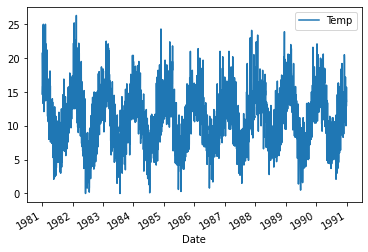

In [4]:
df.plot()

Mean -> constant, Variance -> constant

Seasonality -> can't comment just by seeing visually, so :-
            -> doing Augmented Dickey Fuller Test (ADF test)
            
Commenting over STATIONARITY of plot

## ADF-test :  (For Stationarity)

P-Value  <  0.05 (significance level)   ,

ADF  <  all 3 Critical values

If both conditions fulfilled -> stationary . . . . Else -> non-stationary

In [5]:
# doing ADF test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations used for ADF Regression and Critical Value calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -4.44480492461168
2. P-Value :  0.0002470826300361191
3. Num Of Lags :  20
4. Num Of Observations used for ADF Regression and Critical Value calculation :  3629
5. Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


C:\Users\shash\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


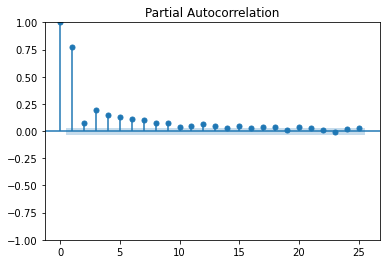

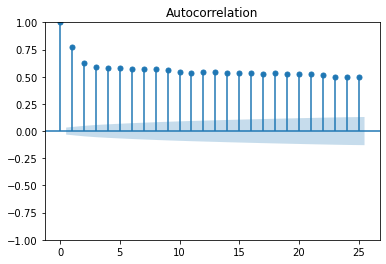

In [6]:
# Plots to see correlations :
# PACF -> Partial Auto-Correlation Function
# ACF -> Auto-Correlation Function
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['Temp'], lags = 25)
acf = plot_acf(df['Temp'], lags = 25)
# x-axis -> time lags
# y-axis -> Pearson's Correlation coefficient [-1, 1]

In PACF, high correlation for t = 1, 2. (considered for AR model)

And, decent correlation till t = 10. (will take into account)

## Creating Model :
Split Dataset into Train and Test. (Testing : Last 7 days)

In [7]:
train = X[ : len(X)-7]
test = X[len(X)-7 : ]  # last 7 values

In [8]:
model = AutoReg(train, lags = 10).fit()

AR-Model has been trained.

In [9]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sun, 24 Apr 2022   AIC                          16775.028
Time:                        20:18:20   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [10]:
print("Size of training data : ", len(train))

Size of training data :  3643


## Prediction time:
Make Predictions on Test Set and Compare

In [11]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


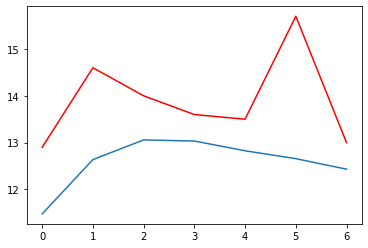

In [12]:
plt.plot(pred)
plt.plot(test, color='red')
print(pred)

Calculate Error

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [14]:
print(rmse)  # Root Mean Square Error

1.563819622086065


Making Future Predictions

In [18]:
pred_future = model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
# X -> was training dataset, X+1 -> where test data starts
print("The future prediction for the next week :")
print(pred_future)
print("Number of Predictions Made  :  ", len(pred_future))

The future prediction for the next week :
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
Number of Predictions Made  :   7
